In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import pandas as pd
%matplotlib inline
import mplsettings

from datetime import timedelta

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.26.4
pandas version :  2.2.3
xarray version :  2025.3.1


In [7]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [8]:
ds = xr.open_mfdataset('CM4Xp25_thetaoga_minus_piC.nc') 
thetaoga_231_232_minus_control = ds['thetaoga_231_232_minus_control']

ds = xr.open_mfdataset('CM4Xp125_thetaoga_minus_piC.nc')
thetaoga_255_293_minus_control = ds['thetaoga_255_293_minus_control']

ds = xr.open_mfdataset('CM4Xp125_piC_thetaoga.nc')
thetaoga_209_313 = ds['thetaoga_209_313']

ds = xr.open_mfdataset('CM4Xp125_hist_ssp_thetaoga.nc')
thetaoga_255_293 = ds['thetaoga_255_293']

ds = xr.open_mfdataset('CM4Xp25_piC_thetaoga.nc')
thetaoga_210_230_306 = ds['thetaoga_210_230_306']

ds = xr.open_mfdataset('CM4Xp25_hist_ssp_thetaoga.nc')
thetaoga_231_232 = ds['thetaoga_231_232']

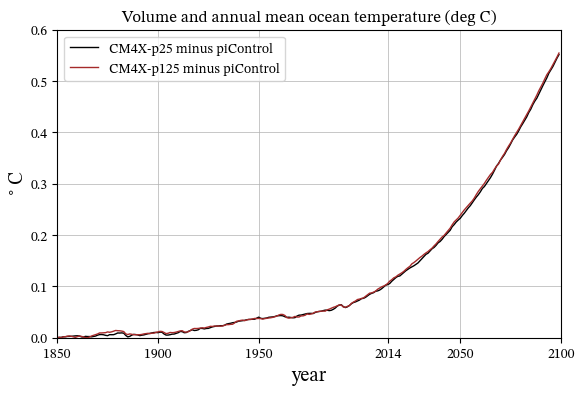

In [9]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

thetaoga_231_232_minus_control.plot.line(ax=axis, label='CM4X-p25 minus piControl',linestyle='solid', color='black', linewidth=1) 
thetaoga_255_293_minus_control.plot.line(ax=axis, label='CM4X-p125 minus piControl',linestyle='solid', color='brown', linewidth=1) 

axis.legend(loc='upper left')
#axis.set_ylim([3.45,4.25])
axis.set_ylim([0,.6])

axis.set_xlim(1850,2100)
#axis.set_ylabel('degree C')
#axis.set_xlabel('year')
axis.set_xlabel('year', fontsize=14)
axis.set_ylabel(r'$^\circ$C',fontsize=14, labelpad=1)


axis.grid(linewidth=.5)
plt.xticks(ticks=[1850, 1900, 1950, 2014, 2050, 2100])
#plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
#plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title('Volume and annual mean ocean temperature (deg C)')
fig.savefig('Fig16_thetaoga_CM4X_minus_piControl.jpg', bbox_inches='tight', dpi=400, format='jpeg')

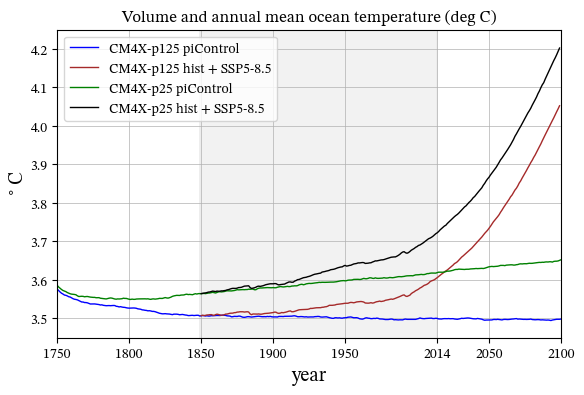

In [10]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

#thetaoga_209_313.plot.line(ax=axis, label='CM4X-p125 piControl new',linestyle='solid', color='cyan', linewidth=1) 

thetaoga_209_313.plot.line(ax=axis, label='CM4X-p125 piControl',linestyle='solid', color='blue', linewidth=1) 
thetaoga_255_293.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
thetaoga_210_230_306.plot.line(ax=axis, label='CM4X-p25 piControl',linestyle='solid', color='green', linewidth=1) 
thetaoga_231_232.plot.line(ax=axis, label='CM4X-p25 hist + SSP5-8.5',linestyle='solid', color='black', linewidth=1) 


axis.legend(loc='upper left')
axis.set_ylim([3.45,4.25])
axis.set_xlim(1750,2100)

axis.set_xlabel('year', fontsize=14)
axis.set_ylabel(r'$^\circ$C',fontsize=14, labelpad=1)


axis.fill_between(thetaoga_209_313['year'].values, 0, thetaoga_209_313['year'].values,
                  where=((thetaoga_209_313['year'] >= 1850) & (thetaoga_209_313['year'] <= 2014)),
                  interpolate=True, color='gray', alpha=0.1)


axis.grid(linewidth=.5)
plt.xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100])
plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title('Volume and annual mean ocean temperature (deg C)')
fig.savefig('Fig16_thetaoga_CM4X.jpg', bbox_inches='tight', dpi=400, format='jpeg')

